# Exploratory Data Analysis & Report on Distributions
This notebook shows the EDA and report on distributions for for the below csv files: [Data folder link](https://drive.google.com/drive/folders/1eImejP0Yh5Wf0pd1PAfwiVDReUCgM45a)
* `domain_130k_features_dns.csv`: 130k domains with DNS and web scraped features data

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
Assume the csv files are saved in a folder from current directory called `data`

In [2]:
PATH = Path("../data")
list(PATH.iterdir())

[PosixPath('../data/domain_130k_features.csv'),
 PosixPath('../data/domain_130k_features_dns.csv'),
 PosixPath('../data/.DS_Store'),
 PosixPath('../data/domain_130k_all.csv'),
 PosixPath('../data/domain_130k_dns.csv'),
 PosixPath('../data/README.md')]

In [3]:
df = pd.read_csv(PATH/'domain_130k_all.csv', low_memory=False)

print("Domain with DNS and Features dataset shape:", df.shape)
print("There are", df.shape[1], "columns.")

Domain with DNS and Features dataset shape: (131325, 204)
There are 204 columns.


In [4]:
df.head()

,id,domain,domain_company_name,data_sources,subdomain,latest_dmarc_parseable,latest_dmarc_at_enforcement,latest_dmarc_agari,latest_dmarc_barracuda,latest_dmarc_dmarc_analyzer,...,category_list,category_list_counts,web_tech,web_tech_counts,tld,linkedin,facebook,twitter,youtube,instagram
0,560,yahoo.com,Yahoo,11299.0,False,True,True,False,False,False,...,"{'Reverse Proxy', 'Miscellaneous', 'Web Framew...",14,"{'Reverse Proxy', 'Miscellaneous', 'Web Framew...",14,com,False,False,False,False,False
1,1016,blogger.com,NaN,3106.0,False,True,True,False,False,False,...,"{'Miscellaneous', 'Captchas', 'Analytics', 'We...",12,"{'Miscellaneous', 'Captchas', 'Analytics', 'We...",12,com,False,False,False,False,False
2,1058,thekitchn.com,The Kitchn,3106.0,False,False,False,False,False,False,...,"{'Miscellaneous', 'Cache Tools', 'Web Framewor...",10,"{'Miscellaneous', 'Cache Tools', 'Web Framewor...",10,com,False,False,False,False,False
3,1242,actblue.com,NaN,3106.0,False,True,False,False,False,False,...,NaN,0,NaN,0,com,False,True,True,False,False
4,1257,office.com,NaN,3106.0,False,True,True,True,False,False,...,NaN,0,NaN,0,com,True,False,False,False,False


## Let's take a look at the column types

In [5]:
df.dtypes.value_counts()

bool       137
object      49
int64       14
float64      4
dtype: int64

# Explore Columns values
Below shows only a few example columns and its values. You can plug in other column names 

In [6]:
# function 
def col_values(dataframe, col_name, n):
    print("For column name:", col_name)
    print("Number of total different categorical values is", len(dataframe[col_name].unique()))
    print("Top", n, "values: \n", dataframe[col_name].unique()[:n])

## Column: tld

In [7]:
col_values(df, 'tld', 50)

For column name: tld
Number of total different categorical values is 864
Top 50 values: 
 ['com' 'co' 'net' 'io' 'org' 'edu' 'at' 'bg' 'fr' 'de' 'hu' 'edu.iq'
 'ac.nz' 'edu.pl' 'ch' 'vc' 'in' 'pl' 'co.kr' 'ne.jp' 'com.mx' 'co.uk'
 'by' 'no' 'co.jp' 'it' 'com.my' 'ru' 'gov.in' 'com.cn' 'jp' 'es' 'us'
 'eu' 'cn' 'co.za' 'be' 'net.pl' 'jobs' 'gov.it' 'sg' 'com.tw' 'dk' 'coop'
 'com.br' 'go.jp' 'com.au' 'ca' 'net.mx' 'fi']


## Column: data_sources

In [8]:
col_values(df, 'data_sources', 10)

For column name: data_sources
Number of total different categorical values is 25
Top 10 values: 
 [1.1299e+04 3.1060e+03 2.0820e+03 2.0000e+00 3.4000e+01        nan
 4.0000e+00 3.6000e+01 2.0840e+03 8.0000e+00]


## Column: sales_priority

In [9]:
col_values(df, 'sales_priority', 21)

For column name: sales_priority
Number of total different categorical values is 21
Top 21 values: 
 [  0   5  80  35  20  10  95  65  55  15  25  75 100  60  70  90  85  50
  45  40  30]


## Column: dmarc_invalid_ruas

In [10]:
col_values(df, 'dmarc_invalid_ruas', 20)

For column name: dmarc_invalid_ruas
Number of total different categorical values is 62
Top 20 values: 
 ['[]' "['marek.novohradsky@kiwi.com', 'jan.kupka@kiwi.com']"
 "['rua@uchi.ru']" "['dmarc.nca.it@noicompriamoauto.it']"
 "['dmarc-reports@naca.com']" "['dmarc@gotocon.com']"
 "['contacts-mailer@wix.com']" "['rajesh@mobileprogramming.net']"
 "['do-not-reply@parkwayparking.com']" "['dmarc_agg@dmarc.250ok.net']"
 "['suman@threads.com']"
 "['postmaster@teamsequel.co', 'dmarc@teamsequel.co']"
 "['fm@deeptechonline.com']" "['justin.tinkle@availvaluerecovery.com']"
 "['postmaster@aldensecurities.com']" "['asher@asherestate.com']"
 "['pat@braintrustinteractive.com']" "['e@accounts.email-template.net']"
 "['No-response@emailcart.in']"
 "['postmaster@finedomains.ca', 'dmarc@finedomains.ca']"]


## Column: dmarc_pct

In [11]:
col_values(df, 'dmarc_pct', 20)

For column name: dmarc_pct
Number of total different categorical values is 19
Top 20 values: 
 [nan 10.  1. 20.  0. 50. 33.  5. 75. 80. 30. 60. 25. 70.  2. 40. 15. 85.
 95.]


# Correlation among numeric columns

In [12]:
num_col= df.select_dtypes(include=['int64','float64'])
num_col.head()

,id,data_sources,id.1,monitored_domain_id,dmarc_pct,spf_domain_lookup_count,forcepoint_id,sales_priority,rn,whois_counts,company_name_counts,host_provider_counts,mail_provider_counts,registrar_counts,security_trail_exist,app_list_exist,category_list_counts,web_tech_counts
0,560,11299.0,9762704,560,NaN,3.0,NaN,0,1,100,7,11,9,5,1,1,14,14
1,1016,3106.0,917440,1016,NaN,4.0,NaN,0,1,0,0,0,0,0,0,1,12,12
2,1058,3106.0,1030695,1058,NaN,8.0,NaN,5,1,0,0,0,0,0,0,1,10,10
3,1242,3106.0,34832866,1242,NaN,9.0,NaN,80,1,0,0,0,0,0,0,0,0,0
4,1257,3106.0,1329884,1257,NaN,NaN,NaN,35,1,100,3,10,8,4,1,0,0,0


### Drop the id columns

In [13]:
num_col.drop(['id', 'id.1', 'monitored_domain_id', 'forcepoint_id'], axis=1, inplace=True)
num_col.head()

,data_sources,dmarc_pct,spf_domain_lookup_count,sales_priority,rn,whois_counts,company_name_counts,host_provider_counts,mail_provider_counts,registrar_counts,security_trail_exist,app_list_exist,category_list_counts,web_tech_counts
0,11299.0,NaN,3.0,0,1,100,7,11,9,5,1,1,14,14
1,3106.0,NaN,4.0,0,1,0,0,0,0,0,0,1,12,12
2,3106.0,NaN,8.0,5,1,0,0,0,0,0,0,1,10,10
3,3106.0,NaN,9.0,80,1,0,0,0,0,0,0,0,0,0
4,3106.0,NaN,NaN,35,1,100,3,10,8,4,1,0,0,0


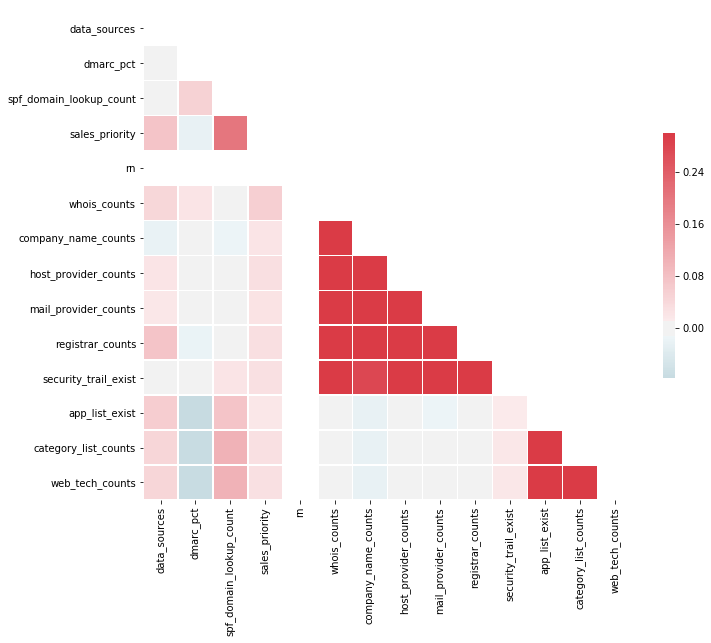

In [14]:
# Compute the correlation matrix
corr = num_col.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Distributions on Boolean Columns

We will choose columns from the below list of features according to their importances
### Feature Importance
- No.1 feature: category_list_counts (0.0742)
- No.2 feature: web_tech_counts (0.0714)
- No.3 feature: whois_counts (0.0614)
- No.4 feature: ns_exists (0.0526)
- No.5 feature: host_provider_counts (0.0481)
- No.6 feature: mail_provider_counts (0.0428)
- No.7 feature: ns_amazon_route53 (0.0381)
- No.8 feature: mx_exists (0.0364)
- No.9 feature: ns_godaddy (0.0362)
- No.10 feature: company_name_counts (0.0355)
- No.11 feature: facebook (0.0351)
- No.12 feature: app_list_exist (0.0291)
- No.13 feature: registrar_counts (0.0291)
- No.14 feature: spf_ends_in_inappropriate_all (0.0268)
- No.15 feature: mx_internal (0.0209)
- No.16 feature: twitter (0.0208)
- No.17 feature: ns_network_solutions (0.0181)
- No.18 feature: instagram (0.0172)
- No.19 feature: spf_exists (0.0172)
- No.20 feature: mx_google (0.0168)

In [15]:
# function
def report_distri(dataset, x_name, title):
    sns.set(style="whitegrid")
    ax = sns.countplot(x=x_name, data=dataset, hue = 'label')
    total = float(len(dataset))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3, '{:1.2%}'.format(height/total), ha="center")
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_title(title)

## Remove 'pending' labels

In [16]:
dataset = df[df['label']!='pending']
dataset['app_list_exist'].replace({0: False, 1:True}, inplace=True)
dataset['security_trail_exist'].replace({0: False, 1:True}, inplace=True)

## Feature: ns_exists

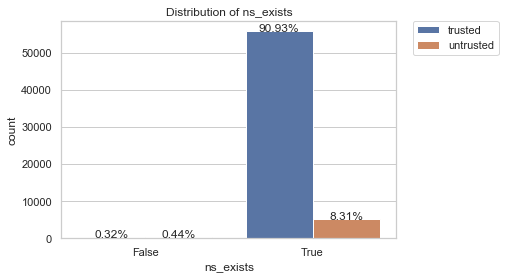

In [17]:
x_name = 'ns_exists'
title = 'Distribution of ' + x_name 

report_distri(dataset, x_name, title)

## Feature: ns_amazon_route53

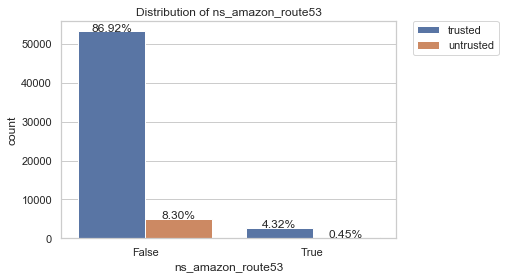

In [18]:
x_name = 'ns_amazon_route53'
title = 'Distribution of ' + x_name 

report_distri(dataset, x_name, title)

## Feature: mx_exists

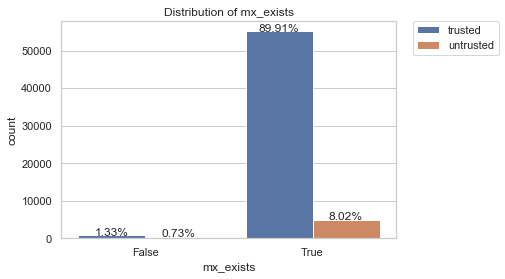

In [19]:
x_name = 'mx_exists'
title = 'Distribution of ' + x_name 

report_distri(dataset, x_name, title)

## Feature: ns_godaddy

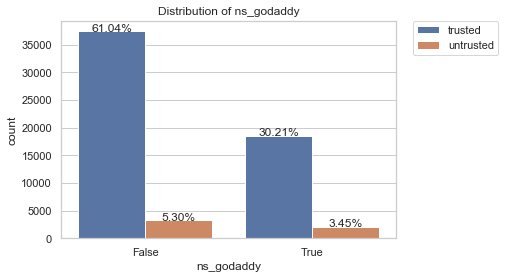

In [20]:
x_name = 'ns_godaddy'
title = 'Distribution of ' + x_name 

report_distri(dataset, x_name, title)

## Feature: facebook

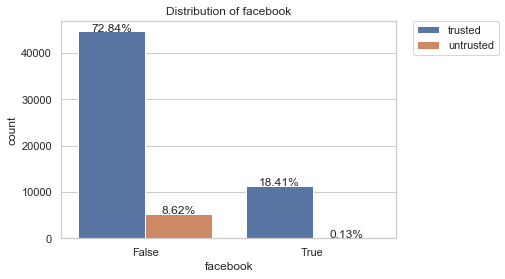

In [21]:
x_name = 'facebook'
title = 'Distribution of ' + x_name 

report_distri(dataset, x_name, title)

## Feature: app_list_exist

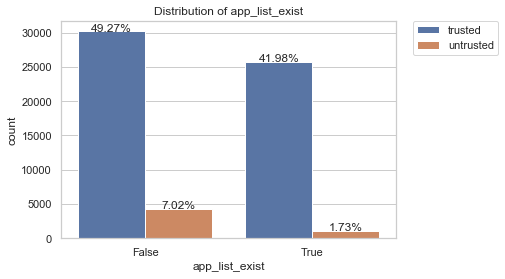

In [22]:
x_name = 'app_list_exist'
title = 'Distribution of ' + x_name 

report_distri(dataset, x_name, title)

## Feature: spf_ends_in_inappropriate_all

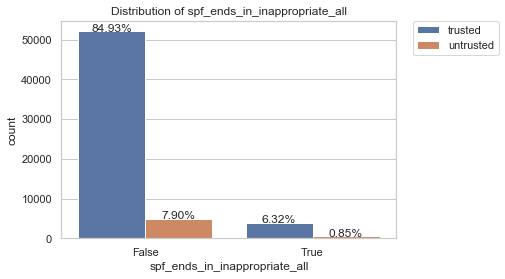

In [22]:
x_name = 'spf_ends_in_inappropriate_all'
title = 'Distribution of ' + x_name 

report_distri(dataset, x_name, title)

## Feature: mx_internal

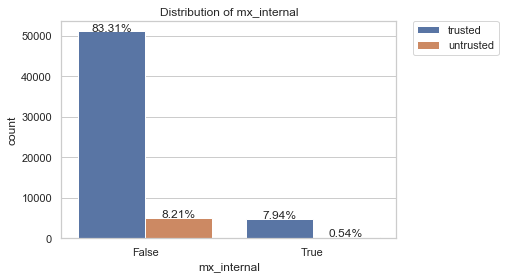

In [24]:
x_name = 'mx_internal'
title = 'Distribution of ' + x_name 

report_distri(dataset, x_name, title)

## Feature: twitter

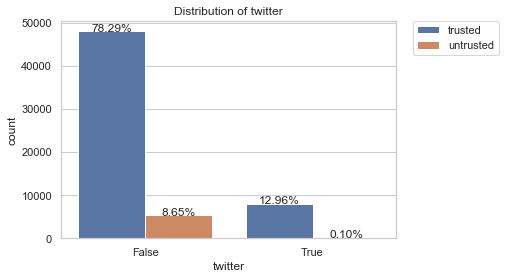

In [25]:
x_name = 'twitter'
title = 'Distribution of ' + x_name 

report_distri(dataset, x_name, title)

## Feature: ns_network_solutions

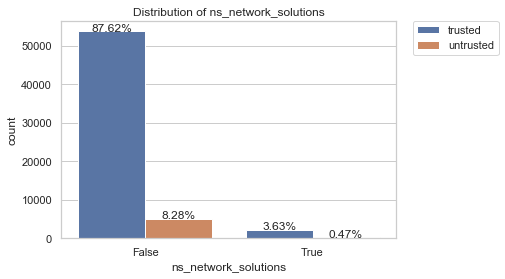

In [26]:
x_name = 'ns_network_solutions'
title = 'Distribution of ' + x_name 

report_distri(dataset, x_name, title)

## Feature: instagram

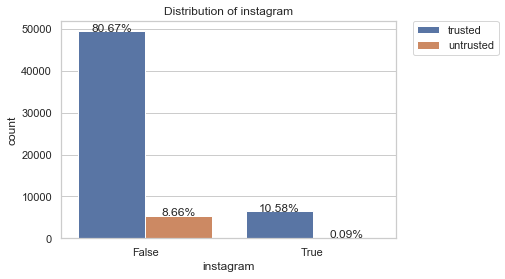

In [23]:
x_name = 'instagram'
title = 'Distribution of ' + x_name 

report_distri(dataset, x_name, title)

## Feature: spf_exists

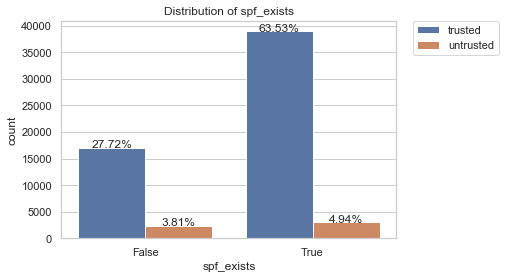

In [24]:
x_name = 'spf_exists'
title = 'Distribution of ' + x_name 

report_distri(dataset, x_name, title)

## Feature: mx_google

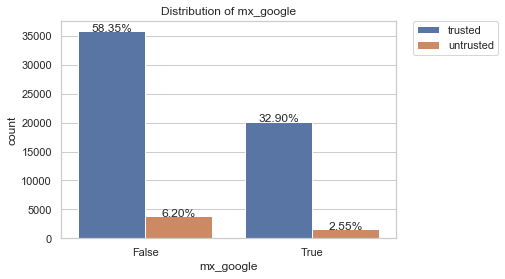

In [25]:
x_name = 'mx_google'
title = 'Distribution of ' + x_name 

report_distri(dataset, x_name, title)